# KAIST Summer Session 2018


## Frozon Lake World using Q-Table (08.27.2018)

In [1]:
%matplotlib inline

## 0. Environment Setting
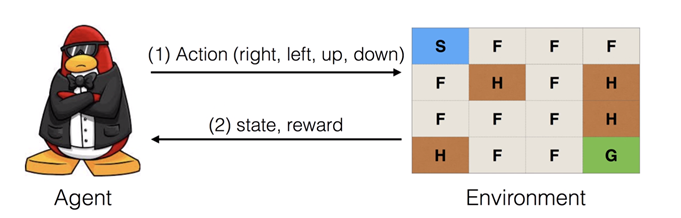

In [2]:
import gym
import torch
import matplotlib.pyplot as plt


from gym.envs.registration import register

register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
)

env = gym.make('FrozenLakeNotSlippery-v0')
# env = gym.make('FrozenLake-v0')

num_episodes = 1000

## 1. Random Action

In [3]:
steps_total = []
rewards_total = []

for i_episode in range(num_episodes):
    
    state = env.reset()
    
    step = 0

    while True:
        step += 1
        
        action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)               
        
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            break
            
            
    if i_episode % 10 == 0:
        print("%i episode finished after %i steps" % (i_episode, step))

0 episode finished after 12 steps
10 episode finished after 3 steps
20 episode finished after 2 steps
30 episode finished after 9 steps
40 episode finished after 2 steps
50 episode finished after 10 steps
60 episode finished after 3 steps
70 episode finished after 15 steps
80 episode finished after 7 steps
90 episode finished after 2 steps
100 episode finished after 5 steps
110 episode finished after 11 steps
120 episode finished after 11 steps
130 episode finished after 5 steps
140 episode finished after 4 steps
150 episode finished after 3 steps
160 episode finished after 10 steps
170 episode finished after 21 steps
180 episode finished after 3 steps
190 episode finished after 5 steps
200 episode finished after 20 steps
210 episode finished after 11 steps
220 episode finished after 20 steps
230 episode finished after 13 steps
240 episode finished after 36 steps
250 episode finished after 12 steps
260 episode finished after 2 steps
270 episode finished after 7 steps
280 episode finish

Percent of episodes finished successfully: 1.3%
Percent of episodes finished successfully (last 100 episodes): 2.0%
Average number of steps: 7.61
Average number of steps (last 100 episodes): 7.12


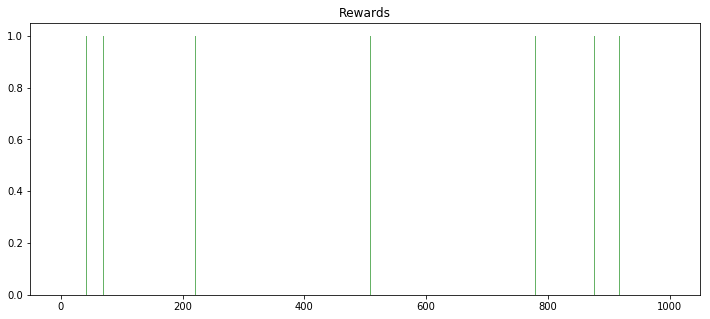

In [4]:
print("Percent of episodes finished successfully: {0}%".format(sum(rewards_total)/num_episodes*100))
print("Percent of episodes finished successfully (last 100 episodes): {0}%".format(sum(rewards_total[-100:])))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))


plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green')
plt.show()

## 2. Q-Learning in a Deterministic Environment

In [5]:
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n

gamma = 0.95

Q = torch.zeros([number_of_states, number_of_actions])

steps_total = []
rewards_total = []

for i_episode in range(num_episodes):
    
    state = env.reset()
    step = 0

    while True:
        
        step += 1
        
        state_noise = Q[state] + torch.rand(1,number_of_actions) / 1000
        
        action = torch.max(state_noise, 1)[1][0]
                
        new_state, reward, done, info = env.step(action.item())
        
        # updating Q-table
        Q[state, action] = reward + gamma * torch.max(Q[new_state])
        
        state = new_state

        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            break
            
            
    if i_episode % 10 == 0:
        print("%i episode finished after %i steps" % (i_episode, step))
        
print(Q)

0 episode finished after 7 steps
10 episode finished after 3 steps
20 episode finished after 5 steps
30 episode finished after 6 steps
40 episode finished after 11 steps
50 episode finished after 6 steps
60 episode finished after 8 steps
70 episode finished after 11 steps
80 episode finished after 14 steps
90 episode finished after 6 steps
100 episode finished after 2 steps
110 episode finished after 21 steps
120 episode finished after 6 steps
130 episode finished after 6 steps
140 episode finished after 6 steps
150 episode finished after 6 steps
160 episode finished after 6 steps
170 episode finished after 6 steps
180 episode finished after 6 steps
190 episode finished after 6 steps
200 episode finished after 6 steps
210 episode finished after 6 steps
220 episode finished after 6 steps
230 episode finished after 6 steps
240 episode finished after 6 steps
250 episode finished after 6 steps
260 episode finished after 6 steps
270 episode finished after 6 steps
280 episode finished after 

Percent of episodes finished successfully: 89.3%
Percent of episodes finished successfully (last 100 episodes): 100.0%
Average number of steps: 6.13
Average number of steps (last 100 episodes): 6.00


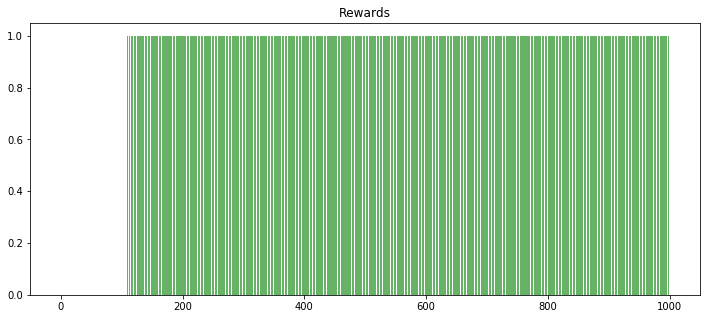

In [6]:
print("Percent of episodes finished successfully: {0}%".format(sum(rewards_total)/num_episodes*100))
print("Percent of episodes finished successfully (last 100 episodes): {0}%".format(sum(rewards_total[-100:])))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))


plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green')
plt.show()

## 3. Q-Learning in a Stochastic Environment

### 3.1. Environment setting

In [7]:
register(
    id='FrozenLakeSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': True},
)

env2 = gym.make('FrozenLakeSlippery-v0')

### 3.2. Does the algorithm for a deterministic environment work?

In [8]:
number_of_states = env2.observation_space.n
number_of_actions = env2.action_space.n

gamma = 0.95

Q = torch.zeros([number_of_states, number_of_actions])

steps_total = []
rewards_total = []

for i_episode in range(num_episodes):
    
    state = env2.reset()
    step = 0

    while True:
        
        step += 1
        
        state_noise = Q[state] + torch.rand(1,number_of_actions) / 1000
        
        action = torch.max(state_noise, 1)[1][0]
                
        new_state, reward, done, info = env2.step(action.item())

        # updating Q-table
        Q[state, action] = reward + gamma * torch.max(Q[new_state])
        
        state = new_state

        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            break
            
            
    if i_episode % 10 == 0:
        print("%i episode finished after %i steps" % (i_episode, step))
        
print(Q)

0 episode finished after 2 steps
10 episode finished after 4 steps
20 episode finished after 7 steps
30 episode finished after 4 steps
40 episode finished after 9 steps
50 episode finished after 14 steps
60 episode finished after 10 steps
70 episode finished after 4 steps
80 episode finished after 7 steps
90 episode finished after 20 steps
100 episode finished after 11 steps
110 episode finished after 17 steps
120 episode finished after 18 steps
130 episode finished after 4 steps
140 episode finished after 13 steps
150 episode finished after 5 steps
160 episode finished after 3 steps
170 episode finished after 23 steps
180 episode finished after 3 steps
190 episode finished after 11 steps
200 episode finished after 6 steps
210 episode finished after 10 steps
220 episode finished after 9 steps
230 episode finished after 13 steps
240 episode finished after 2 steps
250 episode finished after 13 steps
260 episode finished after 7 steps
270 episode finished after 15 steps
280 episode finish

Percent of episodes finished successfully: 1.5%
Percent of episodes finished successfully (last 100 episodes): 0.0%
Average number of steps: 7.92
Average number of steps (last 100 episodes): 7.04


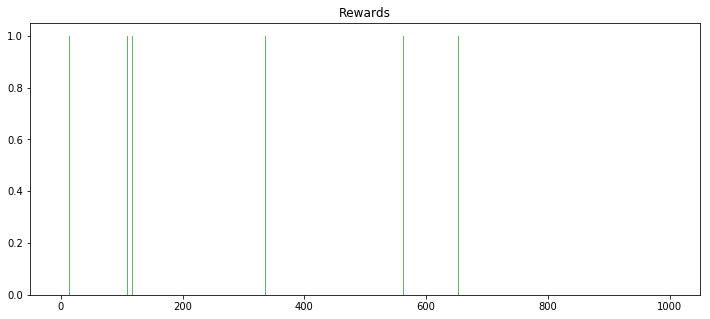

In [9]:
print("Percent of episodes finished successfully: {0}%".format(sum(rewards_total)/num_episodes*100))
print("Percent of episodes finished successfully (last 100 episodes): {0}%".format(sum(rewards_total[-100:])))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))


plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green')
plt.show()

### 3.3. Adding a stochastic component

In [18]:
number_of_states = env2.observation_space.n
number_of_actions = env2.action_space.n

gamma = 0.95
learning_rate = 0.9
egreedy = 0.1


Q = torch.zeros([number_of_states, number_of_actions])

steps_total = []
rewards_total = []

for i_episode in range(num_episodes):
    
    state = env2.reset()
    step = 0

    while True:
        
        step += 1
        
        # ϵ-Greedy Approach
        random_for_egreedy = torch.rand(1)[0]
    
        if  random_for_egreedy > egreedy/(i_episode+1):      
            state_noise  = Q[state] + torch.rand(1,number_of_actions) / 1000     
            action = torch.max(state_noise, 1)[1][0]  
            action = action.item()
        else:
            action = env2.action_space.sample()
                
                
        new_state, reward, done, info = env2.step(action)
        
        # updating Q-table with a learning rate        
        Q[state, action] = (1 - learning_rate) * Q[state, action] \
            + learning_rate * (reward + gamma * torch.max(Q[new_state]))
        
        state = new_state

        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            break
            
            
    if i_episode % 10 == 0:
        print("%i episode finished after %i steps" % (i_episode, step))
        
print(Q)

0 episode finished after 5 steps
10 episode finished after 9 steps
20 episode finished after 4 steps
30 episode finished after 20 steps
40 episode finished after 10 steps
50 episode finished after 13 steps
60 episode finished after 3 steps
70 episode finished after 4 steps
80 episode finished after 12 steps
90 episode finished after 4 steps
100 episode finished after 5 steps
110 episode finished after 3 steps
120 episode finished after 8 steps
130 episode finished after 6 steps
140 episode finished after 11 steps
150 episode finished after 4 steps
160 episode finished after 5 steps
170 episode finished after 21 steps
180 episode finished after 16 steps
190 episode finished after 17 steps
200 episode finished after 4 steps
210 episode finished after 2 steps
220 episode finished after 3 steps
230 episode finished after 9 steps
240 episode finished after 2 steps
250 episode finished after 26 steps
260 episode finished after 37 steps
270 episode finished after 23 steps
280 episode finished

Percent of episodes finished successfully: 54.50000000000001%
Percent of episodes finished successfully (last 100 episodes): 75.0%
Average number of steps: 59.29
Average number of steps (last 100 episodes): 83.27


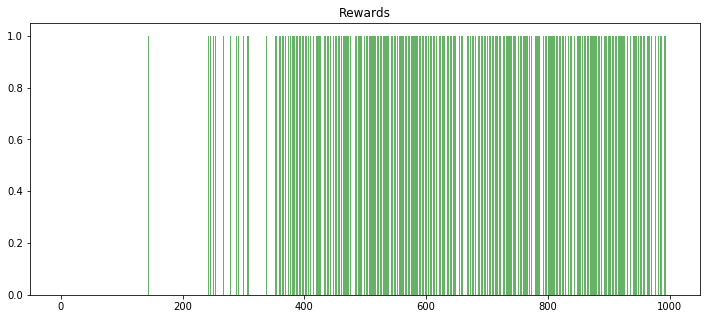

In [19]:
print("Percent of episodes finished successfully: {0}%".format(sum(rewards_total)/num_episodes*100))
print("Percent of episodes finished successfully (last 100 episodes): {0}%".format(sum(rewards_total[-100:])))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))


plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green')
plt.show()